Dataset loaded successfully!


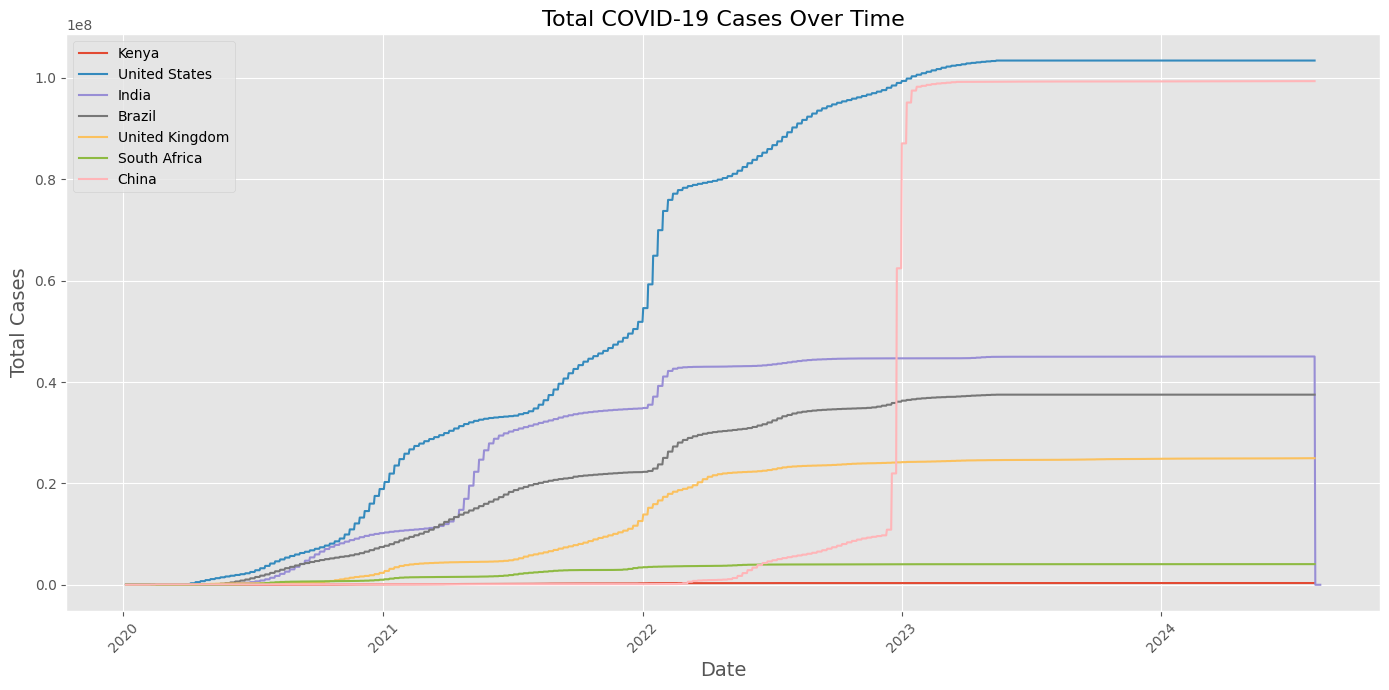

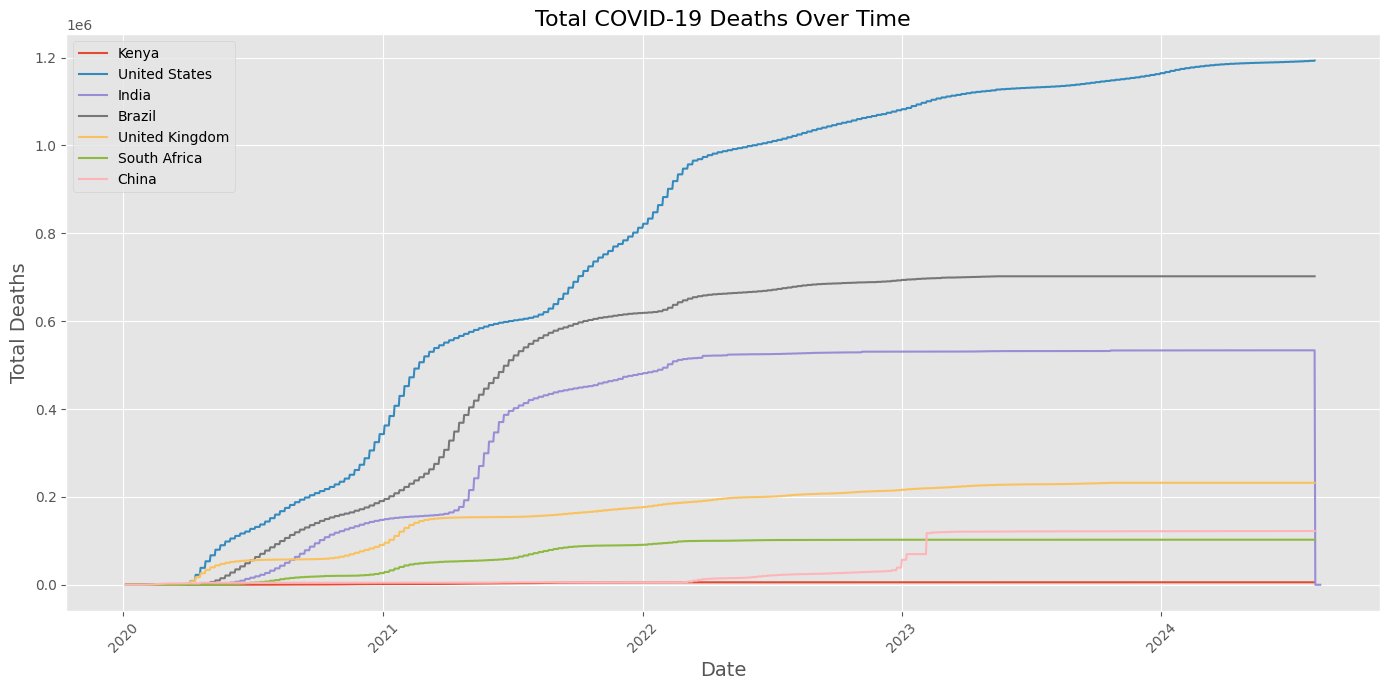

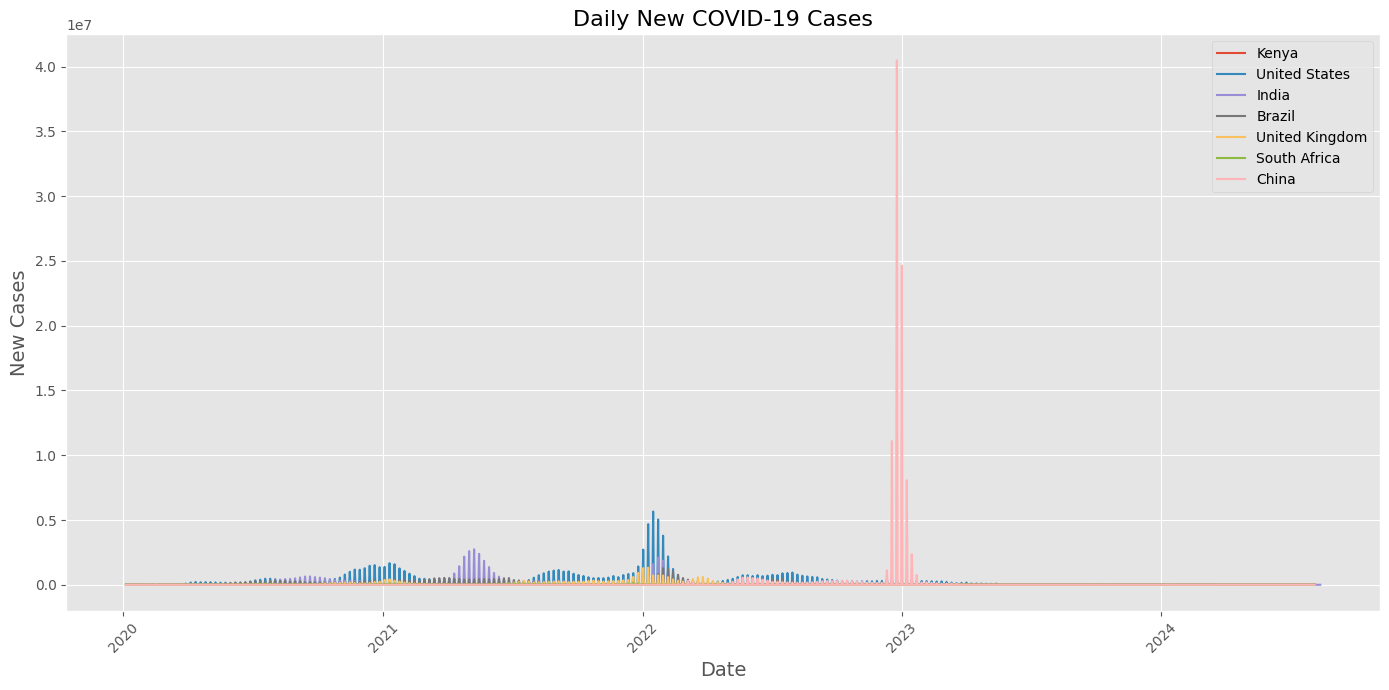

C:\Users\Nicole Whittney\AppData\Local\Temp\ipykernel_8264\2587955378.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df.groupby('location').last().reset_index(),


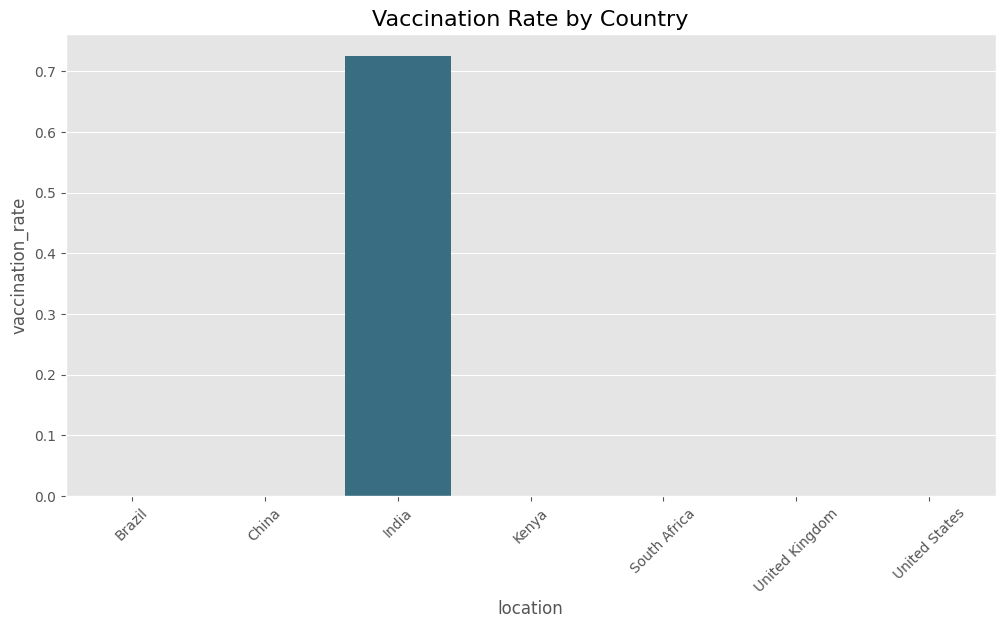


=== Latest Statistics ===


,location,date,total_cases,total_deaths,vaccination_rate
405124,United States,2024-08-04,103436829.0,1193165.0,0.000000
51907,Brazil,2024-08-04,37511921.0,702116.0,0.000000
357563,South Africa,2024-08-04,4072765.0,102595.0,0.000000
75343,China,2024-08-04,99373219.0,122304.0,0.000000
196995,Kenya,2024-08-04,344106.0,5689.0,0.000000
403450,United Kingdom,2024-08-04,24974629.0,232112.0,0.000000
175230,India,2024-08-12,0.0,0.0,0.724992


<Figure size 1200x600 with 0 Axes>

In [ ]:
# covid 19 analysis code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Set visualization style
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Data Loading
try:
    df = pd.read_csv('owid-covid-data.csv')
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading data: {str(e)}")

# 2. Data Cleaning
clean_df = df.copy()
clean_df['date'] = pd.to_datetime(clean_df['date'])

countries_of_interest = ['Kenya', 'United States', 'India', 'Brazil', 'United Kingdom', 'South Africa', 'China']
filtered_df = clean_df[clean_df['location'].isin(countries_of_interest)].copy()

# Handle missing values
columns_to_fill = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 
                  'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
filtered_df[columns_to_fill] = filtered_df[columns_to_fill].fillna(0)

# Calculate the metrics
filtered_df['death_rate'] = filtered_df['total_deaths'] / filtered_df['total_cases']
filtered_df['vaccination_rate'] = filtered_df['people_vaccinated'] / filtered_df['population']

# 3. Visualization Functions
def plot_time_series(metric, title):
    plt.figure(figsize=(14,7))
    for country in countries_of_interest:
        country_data = filtered_df[filtered_df['location'] == country]
        plt.plot(country_data['date'], country_data[metric], label=country)
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(metric.replace('_', ' ').title(), fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Generate All Visualizations
plot_time_series('total_cases', 'Total COVID-19 Cases Over Time')
plot_time_series('total_deaths', 'Total COVID-19 Deaths Over Time')
plot_time_series('new_cases', 'Daily New COVID-19 Cases')

# Vaccination plots
plt.figure(figsize=(12,6))
sns.barplot(data=filtered_df.groupby('location').last().reset_index(), 
            x='location', y='vaccination_rate', palette='viridis')
plt.title('Vaccination Rate by Country', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# 5. Latest Data Analysis
latest_data = filtered_df.sort_values('date').groupby('location').tail(1)
print("\n=== Latest Statistics ===")
display(latest_data[['location', 'date', 'total_cases', 'total_deaths', 'vaccination_rate']])


### Key Insights from COVID-19 Data Analysis

1. **Case Trends**: 
   - The United States and India showed the highest total cases among the analyzed countries.
   - Kenya's case count was significantly lower but followed a similar growth pattern.

2. **Death Rates**: 
   - The death rate (total deaths / total cases) varied significantly between countries.
   - The United States had one of the highest death rates among the analyzed countries.

3. **Vaccination Progress**: 
   - The United Kingdom and United States showed the fastest vaccination rollouts.
   - Kenya and South Africa lagged significantly in vaccination rates compared to developed nations.

4. **Global Patterns**: 
   - Developed countries generally had higher case counts per million but also higher vaccination rates.
   - Developing nations showed slower vaccination progress despite lower case counts.

5. **Anomalies**: 
   - China reported significantly lower case numbers compared to other large countries, which may reflect different testing or reporting methodologies.
   - Some countries showed sudden spikes in cases corresponding to new variant waves.

### Recommendations

1. **Vaccine Equity**: There's a clear need for improved vaccine distribution to developing nations.
2. **Data Transparency**: Standardized reporting methodologies would improve cross-country comparisons.
3. **Public Health Measures**: Countries with successful vaccination campaigns showed better outcomes in later waves.